In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df['mainroad'] = df['mainroad'].map({'yes':1,'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1,'no':0})
df['basement'] = df['basement'].map({'yes':1,'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1,'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1,'no':0})


In [4]:
# making dummy variables:
status = pd.get_dummies(df['furnishingstatus'],drop_first = True)
df1 = pd.concat([df,status],axis = 1)
df1 = df1.drop(['furnishingstatus'],axis = 1)

In [5]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
df1 = df1.apply(normalize)

In [6]:
X = df1.drop(['price'],axis = 1)
y = df1['price']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 72)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [9]:
X_train.shape

(381, 13)

In [154]:
X_train1 = X_train.drop(['bedrooms','guestroom','semi-furnished'],axis = 1)

In [156]:
lr = LinearRegression(normalize = True)
rfe = RFE(lr,10)
rfe = rfe.fit(X_train1,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


In [157]:
#area-bathrooms-stories-parking-prefarea-hotwaterheating-airconditioning-basement-unfurnished-mainroad
#bedrooms(removed)- guestroom(removed)-semi-furnished(removed)

In [158]:
col = X_train1.columns[rfe.support_]
X_train2 = X_train1[col]

In [159]:
model = sm.OLS(y_train,sm.add_constant(X_train2)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     78.03
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           8.16e-85
Time:                        21:23:02   Log-Likelihood:                 352.50
No. Observations:                 381   AIC:                            -683.0
Df Residuals:                     370   BIC:                            -639.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.305e-05      0.005     

In [162]:
lr1 = LinearRegression()
lr1.fit(X_train2,y_train)
print(lr1.intercept_)
print(lr1.coef_)


-4.3052918448072824e-05
[ 0.3126057   0.29671226  0.12132286  0.03479669  0.04741417  0.07799354
  0.07088988  0.07354363  0.05583795 -0.03806637]


In [169]:
X_test2 = X_test[col]
y_pred = lr1.predict(X_test2)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.006875235029403985
0.6636947067397776


G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


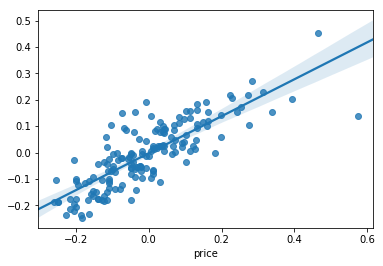

In [170]:
sns.regplot(y_test,y_pred)

In [174]:
X_train3 = sm.add_constant(X_train2)
model1 = sm.OLS(y_train,X_train3).fit()

In [179]:
y_pred2 = model1.predict(X_train3)
residuals = model1.resid

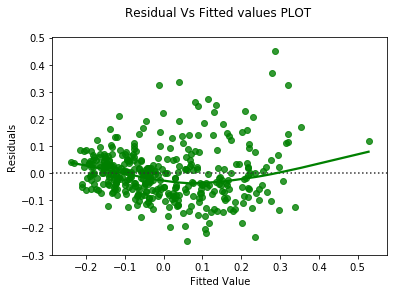

In [180]:
# Plot the residuals after fitting a linear model
ax = sns.residplot(y_pred2, residuals, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Probability density')

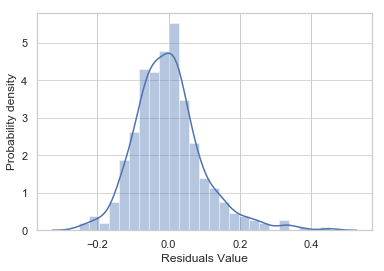

In [181]:
sns.set(style="whitegrid")
sns.distplot(residuals)

plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Residuals Value')
plt.ylabel('Probability density')

## END